# Digit Recognition using the MNIST dataset

## Application of Tensorflow and Keras

## Table of Contents

In [ ]:
# - Introduction
# - Steps
# - Importing packages
# - Keras Convolutional Network
#  - Building a small CNN
#  - Predictions
#  - Building a larger CNN
#  - Predictions
# - TensorFlow fully-connected network
#  - Predictions

## Introduction

The MNIST dataset contains 70,000 images of digits taken from several scanned documents (normalized in size and centered). Each image is seen by the computer as an array of $28\times 28$ pixels squared. Each of these numbers is given a value from inside $[0,255]$, describing the pixel intensity at that point. Giving the computer this array of numbers, it will output numbers describing the probability of the image pertaining to a given class.

In this notebook I will train on the MNIST dataset four types of neural networks, namely:
- A convolutional neural network using `Keras`
- A convolutional neural network using `TensorFlow`
- A fully-connected neural network using `Keras`
- A fully-connected neural network using `TensorFlow`



## Steps:

In [1]:
# - We first load the data
# - Then we split the feature matrix `X` and the target vector `y` into `train` and `test` subsets.
# - This is followed by data preprocessing where:
#   - `X` is normalized, dividing each pixel value by the maximum value of a pixel (255)
#   - Since this is a multi-class classification problem, `Keras` needs `y` to be a one-hot encoded matrix
# - Create the neural network:
#  - A `Keras` convolutional network
#  - A `TensorFlow` fully-connected network
# - Since we have multi-class classification we will use a `softmax` activation function on the output layer.
# - Regularization and dropout can be used to improve performance.
# -  We then train the network.
# -  After training, we make predictions (numbers in the range 0-9).

## ConvNet with `Keras`

### Importing packages

In [46]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # see the value of multiple statements at once.
pd.set_option('display.max_columns', None)
import pylab
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
seed = 42
np.random.seed(seed)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # see the value of multiple statements at once.

### Loading the `MNIST` dataset

In [30]:
train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [31]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [33]:
y_train = train['label']
y_train.head()

X_train = train.drop('label',axis = 1) 
X_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [34]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

The predictors $X$ and target $y$ are `numpy` arrays:

In [35]:
print('The features of the training set has shape: ',X_train.shape)
print('The target of the training set has shape: ',y_train.shape)
print('The features of the testing set has shape: ',X_test.shape)

The features of the training set has shape:  (42000, 784)
The target of the training set has shape:  (42000,)
The features of the testing set has shape:  (28000, 784)


The number of classes is:

In [36]:
num_classes = len(set(list(y_train)))
num_classes

10

### Checking for imbalanced classes and null values

- Classes are well-balanced
- No null values

In the `Series` below:
- top is the most common value in this case the boolean `False` 
- unique is 1 because there are only entries equal to `False`
- freq is the most common value’s frequency, which in this case is 784 (all entries)

count       784
unique        1
top       False
freq        784
dtype: object

count       784
unique        1
top       False
freq        784
dtype: object

1    0.112
7    0.105
3    0.104
9    0.100
2    0.099
6    0.098
0    0.098
4    0.097
8    0.097
5    0.090
Name: label, dtype: float64

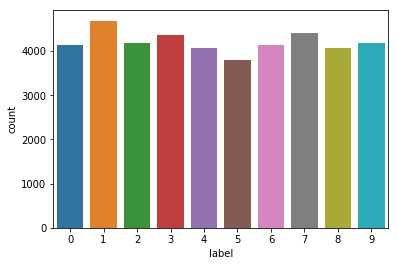

In [62]:
X_train.isnull().any().describe()
X_test.isnull().any().describe()
round(y_train.value_counts()/y_train.shape[0],3)
sns.countplot(y_train)

### Transforming `y` into a one-hot encoded matrix and normalizing  
# AQUIIIIII

In [8]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

X_train.shape

X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

(60000, 1, 28, 28)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## `Keras` Convolutional Network

Roughly speaking, convolutional neural networks (CNN) start from pixels, then get to edges, then corners, until a digit is obtained. Let uis first build a small CNN and then a larger one:

### Building a small CNN:


The function `cnn_model` below builds the following CNN:

- We have a convolutional layer with 30 feature maps of size 5 $\times$ 5.

        model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation ='relu'))
        
- Then we have a pooling layer which takes the maximum over 2 $\times$ 2 patches.
- A Dropout layer with a probability of 20$%$.
- Then a `Flatten` layer is included
- Then we have a fully connected layer containing 128 neurons and a `reLU` activation. 
- Output layer.

In [56]:
num_classes = 10

In [57]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [58]:
small_model = cnn_model()
history = small_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200,verbose=2)
scores = small_model.evaluate(X_test, y_test, verbose=2)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 119s - loss: 0.2434 - acc: 0.9304 - val_loss: 0.0744 - val_acc: 0.9776
Epoch 2/20
 - 117s - loss: 0.0735 - acc: 0.9775 - val_loss: 0.0534 - val_acc: 0.9827
Epoch 3/20
 - 116s - loss: 0.0538 - acc: 0.9836 - val_loss: 0.0454 - val_acc: 0.9847
Epoch 4/20
 - 114s - loss: 0.0421 - acc: 0.9871 - val_loss: 0.0406 - val_acc: 0.9870
Epoch 5/20
 - 123s - loss: 0.0348 - acc: 0.9889 - val_loss: 0.0392 - val_acc: 0.9874
Epoch 6/20
 - 125s - loss: 0.0283 - acc: 0.9911 - val_loss: 0.0331 - val_acc: 0.9902
Epoch 7/20
 - 117s - loss: 0.0230 - acc: 0.9928 - val_loss: 0.0357 - val_acc: 0.9880
Epoch 8/20
 - 122s - loss: 0.0204 - acc: 0.9931 - val_loss: 0.0381 - val_acc: 0.9879
Epoch 9/20
 - 116s - loss: 0.0177 - acc: 0.9943 - val_loss: 0.0420 - val_acc: 0.9865
Epoch 10/20
 - 125s - loss: 0.0138 - acc: 0.9954 - val_loss: 0.0326 - val_acc: 0.9900
Epoch 11/20
 - 118s - loss: 0.0118 - acc: 0.9959 - val_loss: 0.0420 - val_acc: 0.9868
Epoch 12/20
 

In [59]:
train_loss_small = history.history['loss']
test_loss_small = history.history['val_loss']

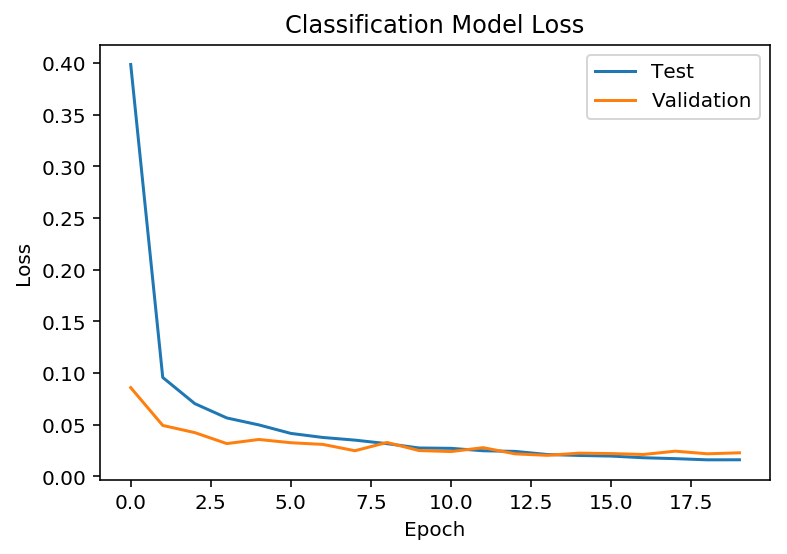

In [60]:
fig = plt.figure()
plt.plot(train_loss)
plt.plot(test_loss)
plt.title('Classification Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#pylab.xlim([0,60])
plt.legend(['Test', 'Validation'], loc='upper right')
fig.savefig('loss.png')
plt.show();

We can clearly see from the test curve that there is substantial overfitting.

### Building a larger CNN:

Let us build Another function `large_cnn_model`. The topology now is:

- A convolutional layer with 30 feature maps of size 5 $\times$ 5.

        model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation = activation_1))
        
- Then we have a pooling layer which takes the maximum over 2 $\times$ 2 patches.
- Then a convolutional layer with 15 feature maps of size 3 × 3 is included.
- The next steps is to include a pooling layer takes the maximum over 2 $\times$ 2 patches.
- A Dropout layer with a probability of 20$%$.
- Then a flatten layer is included
- Then we have a fully connected layer containing 128 neurons and a `reLU` activation. 
- Finally we hve a fully connected layer with 50 neurons and `reLU` activation.
- Output layer.

In [61]:
def cnn_model_large():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

In [62]:
large_model = cnn_model_large()
large_history = large_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                                epochs=20, batch_size=200,verbose=2)
large_scores = large_model.evaluate(X_test, y_test, verbose=2)
print("CNN Error: %.2f%%" % (100-large_scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 111s - loss: 0.3766 - acc: 0.8823 - val_loss: 0.0786 - val_acc: 0.9764
Epoch 2/20
 - 138s - loss: 0.0873 - acc: 0.9727 - val_loss: 0.0397 - val_acc: 0.9866
Epoch 3/20
 - 132s - loss: 0.0648 - acc: 0.9800 - val_loss: 0.0335 - val_acc: 0.9880
Epoch 4/20
 - 131s - loss: 0.0512 - acc: 0.9836 - val_loss: 0.0362 - val_acc: 0.9878
Epoch 5/20
 - 120s - loss: 0.0444 - acc: 0.9863 - val_loss: 0.0283 - val_acc: 0.9902
Epoch 6/20
 - 123s - loss: 0.0382 - acc: 0.9883 - val_loss: 0.0262 - val_acc: 0.9913
Epoch 7/20
 - 114s - loss: 0.0342 - acc: 0.9888 - val_loss: 0.0272 - val_acc: 0.9914
Epoch 8/20
 - 112s - loss: 0.0328 - acc: 0.9895 - val_loss: 0.0271 - val_acc: 0.9914
Epoch 9/20
 - 118s - loss: 0.0284 - acc: 0.9911 - val_loss: 0.0295 - val_acc: 0.9896
Epoch 10/20
 - 110s - loss: 0.0275 - acc: 0.9913 - val_loss: 0.0227 - val_acc: 0.9924
Epoch 11/20
 - 108s - loss: 0.0256 - acc: 0.9919 - val_loss: 0.0276 - val_acc: 0.9901
Epoch 12/20
 

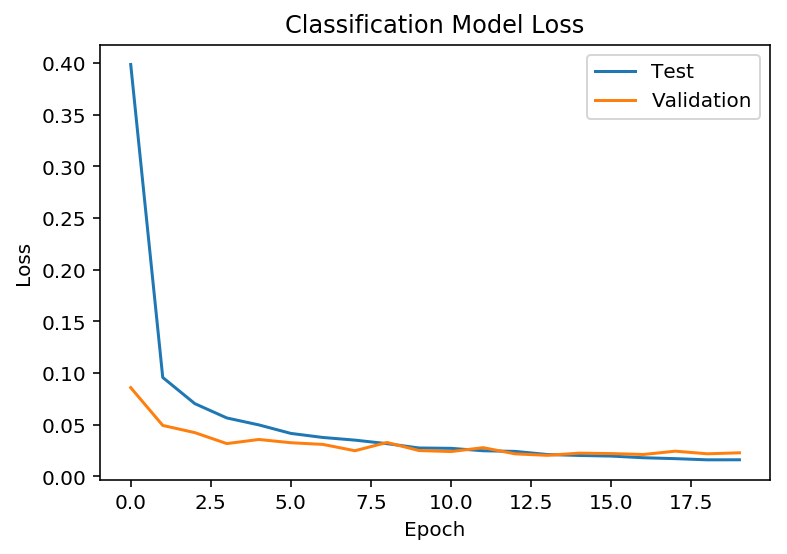

In [55]:
train_loss_large = large_history.large_history['loss']
test_loss_large = large_history.large_history['val_loss']

fig = plt.figure()
plt.plot(train_loss_large)
plt.plot(test_loss_large)
plt.title('Classification Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#pylab.xlim([0,60])
plt.legend(['Test', 'Validation'], loc='upper right')
fig.savefig('loss.png')
plt.show();


## `TensorFlow` fully-connected network

In [8]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [28]:
X_train = mnist.train.images[:50000,:]
y_train = mnist.train.labels[:50000,:]
X_test = mnist.test.images[:10000,:]
y_test = mnist.test.labels[:10000,:]

In [29]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(50000, 784)

(50000, 10)

(10000, 784)

(10000, 10)

In [53]:
# ### Dataset

# - We have a dataset of 70,000 examples of handwritten digits in the interval $[0,9]$
# - Each of the examples is a 28 $\times$ 28 pixel image that is flattened into a vector with 784 values.
# - The `y_train` is not stored as an integer but one-hot encoding is used.

### Defining our session and initializing variables

The session is just a flow charts. The variables will be inputed later on.

In [37]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

### Placeholders

- `TensorFlow` uses placeholders which are variables into which data is fed. 
        
        x = tf.placeholder(tf.float32, shape=[None, 784])
        y_ = tf.placeholder(tf.float32, shape=[None, 10])

- Using the optional argument `None` allows for feeding any number of inputs of size 784 (for `x`) or 10 (for `y`).

        


In [30]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

### Weights and bias

The weight matrix and bias vectors are introduced as below. The dimensions of $W$ and $b$ are respectively, 784 $\times$ 10 and $b$ is a vector of 10 components.

In [33]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

### Activation function and loss function

- We use the `softmax` as our activation 
- The loss function is the cross-entropy:

$$ J =  - \frac{1}{m}\sum\limits_{i = 1}^m {[{y^{(i)}}\ln {{\hat y}^{(i)}} + (1 - {y^{(i)}})\ln (1 - {{\hat y}^{(i)}})]} $$

where the $m$ is the number of the training examples, $y^{(i)}$ are the true values and the ${\hat y}^{(i)}$ are the predictions.

In [36]:
y = tf.nn.softmax(tf.matmul(x,W) + b)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

### Training using gradient descent

- We need to define the training method (GD) and variables for determining the accuracy.

In [39]:
learning_rate = 0.05
training = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
acc = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [41]:
training_steps = 200
for i in range(training_steps+1):
    sess.run(training, feed_dict={x: X_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' 
              + str(sess.run(acc, feed_dict={x: X_test, y_: y_test})) 
              + '  Loss = ' + str(sess.run(cross_entropy, {x: X_train, y_: y_train})))

Training Step:0  Accuracy =  0.6668  Loss = 2.2496228
Training Step:100  Accuracy =  0.8517  Loss = 0.8058997
Training Step:200  Accuracy =  0.8724  Loss = 0.61918044


In [42]:
sess.run(y, feed_dict={x: X_train})

array([[1.05175991e-02, 2.02972768e-03, 1.31735414e-01, ...,
        5.89161277e-01, 3.20755057e-02, 1.19102508e-01],
       [9.49709490e-03, 5.94978267e-03, 1.39137516e-02, ...,
        1.36566116e-02, 2.16344476e-01, 3.60074975e-02],
       [3.32676200e-03, 9.74978087e-04, 3.28248972e-03, ...,
        5.64284287e-02, 9.43160579e-02, 4.51912224e-01],
       ...,
       [9.05195117e-01, 1.01155296e-04, 2.25597154e-03, ...,
        8.90060037e-04, 1.05839584e-03, 3.01509630e-04],
       [3.05447052e-03, 8.75471858e-04, 6.15944061e-03, ...,
        1.97964814e-02, 6.58972338e-02, 3.66699666e-01],
       [9.52199399e-01, 3.13823548e-05, 6.72284630e-04, ...,
        2.03389791e-03, 6.14917080e-04, 6.67153683e-04]], dtype=float32)

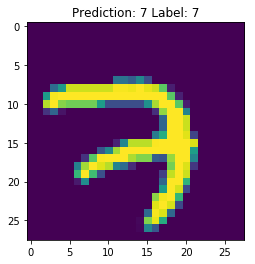

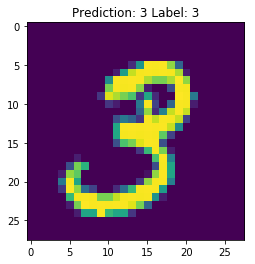

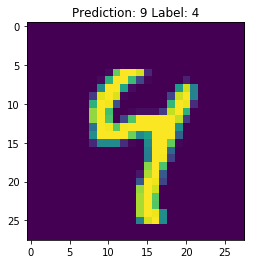

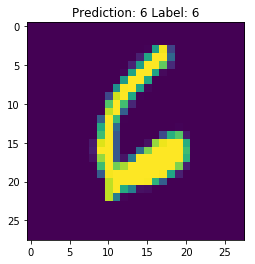

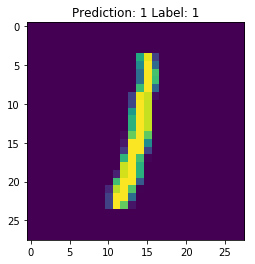

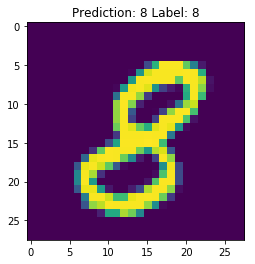

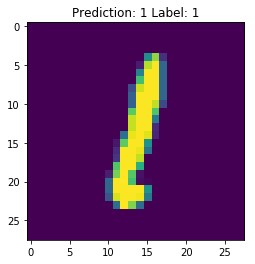

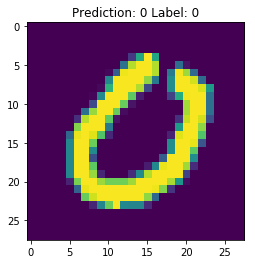

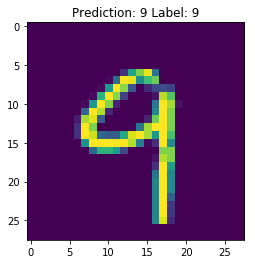

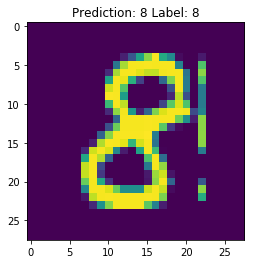

In [48]:
def display_compare(num):
    X_train, y_train = mnist.train.images[num,:].reshape(1,784),mnist.train.labels[num,:]
    label = y_train.argmax()
    
    plt.title('Prediction: %d Label: %d' % (sess.run(y, feed_dict={x: X_train}).argmax() , label))
    plt.imshow(X_train.reshape([28,28]))
    plt.show()

for i in range(0,10):
    display_compare(i)